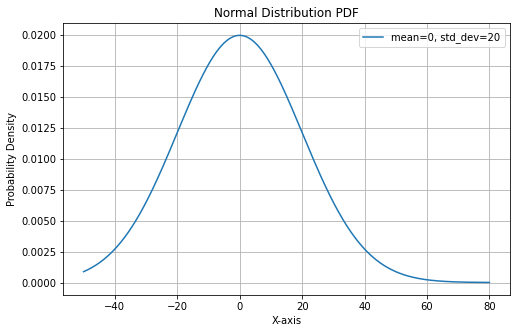

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 範囲を指定
x_values = np.linspace(-50, 80, 1000)  # 適切な範囲を指定

# 平均と標準偏差を指定して確率密度関数 (PDF) を計算
mean = 0
std_dev = 20
pdf_values = norm.pdf(x_values, mean, std_dev)

# グラフの描画
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label=f"mean={mean}, std_dev={std_dev}")
plt.title('Normal Distribution PDF')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
import numpy as np

# pmstmatrix[t-1, :, :] は与えられた行列と仮定しています
# ここでは適当なデータで代用しています
pmstmatrix = np.array([
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0]
])

# 非ゼロ要素のインデックスを取得
non_zero_indices = np.transpose(np.nonzero(pmstmatrix)) +1

# タプル形式のリストに変換
non_zero_tuples = [tuple(index) for index in non_zero_indices]

# 結果の表示
print(non_zero_tuples)


[(1, 5), (5, 5), (6, 2)]


In [10]:
import numpy as np

# 行列 A とベクトル b を定義
A = np.array([[1, 2], [3, 4]])  # 例として 2x2 の行列を定義
b = np.array([5, 6])  # 例として長さ 2 のベクトルを定義

# 行列 A とベクトル b の要素ごとの積を計算
result = A * b[:, None]  # b を列ベクトルに変換して要素ごとの掛け算を行う

# 結果の表示
print(result)


[[ 5 10]
 [18 24]]


In [11]:
import numpy as np

# 行列 A とベクトル b を定義
A = np.array([[1, 2], [3, 4]])  # 例として 2x2 の行列を定義
b = np.array([5, 6])  # 例として長さ 2 のベクトルを定義

# 行列 A とベクトル b の要素ごとの積を計算
result = A * b  # b を列ベクトルに変換して要素ごとの掛け算を行う

# 結果の表示
print(result)


[[ 5 12]
 [15 24]]


In [56]:
import numpy as np
ts = 2
# 仮のpmstmatrixの例を作成
pmstmatrix = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[2, 3, 4], [5, 6, 7], [8, 9, 10]],
    [[3, 4, 5], [6, 7, 8], [9, 10, 11]]
])

# tsに該当するスライスを取得
ts_slice = pmstmatrix[ts]

print(f'ts_slice={ts_slice}')

# 行ごとの合計を計算
deno = np.sum(ts_slice, axis=1)

print(f'deno計算後ts_sliceの0番目{ts_slice[0]}')

print(ts_slice.shape)

# 分母の正規化
deno = (deno == 0) * 1 + (deno != 0) * deno
deno_rep = np.tile(deno, 3).reshape(3, 3).T

print(f'結果こっち{ts_slice/deno_rep}')

print(f'deno_rep{deno_rep}')
deno_matrix = deno.reshape(3, 1)
print(f'denomat{deno_matrix}')
print(f'deno={deno}')
print(ts_slice.dtype)

print(f'結果{ts_slice/deno}')

pmstmatrix[ts] = [ts_slice[i] / deno[i] for i in range(3)] #[:, np.newaxis]

#print(f'計算{ts_slice[0]/deno[0][:, None]}')

a = ts_slice / deno
np.set_printoptions(precision=5)
print(deno[0])
print(ts_slice[0])
# 結果を表示
print(pmstmatrix[ts])

ts_slice=[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
deno計算後ts_sliceの0番目[3 4 5]
(3, 3)
結果こっち[[0.25    0.33333 0.41667]
 [0.28571 0.33333 0.38095]
 [0.3     0.33333 0.36667]]
deno_rep[[12 12 12]
 [21 21 21]
 [30 30 30]]
denomat[[12]
 [21]
 [30]]
deno=[12 21 30]
int64
結果[[0.25    0.19048 0.16667]
 [0.5     0.33333 0.26667]
 [0.75    0.47619 0.36667]]
12
[0 0 0]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [22]:
print(6/4)

1.5


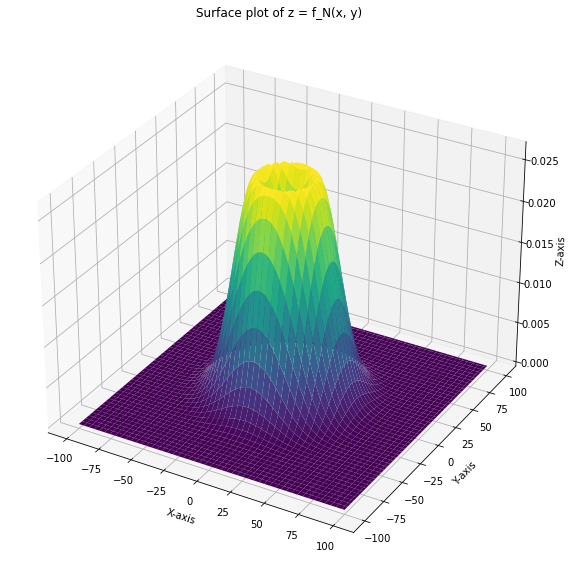

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 関数の定義
def f_N(x, y, dest, sigma):
    d = np.sqrt(x**2 + y**2)
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(d - dest)**2 / (2 * sigma**2))

# メッシュグリッドの作成
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f_N(X, Y, dest=20, sigma=15)

# 3Dプロット
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Surface plot of z = f_N(x, y)')

plt.show()


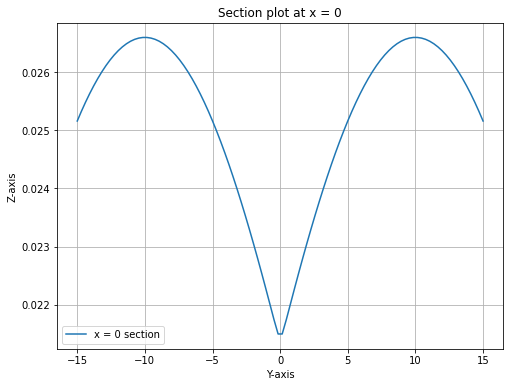

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 関数の定義
def f_N(x, y, dest, sigma):
    d = np.sqrt(x**2 + y**2)
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(d - dest)**2 / (2 * sigma**2))

# メッシュグリッドの作成
x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)
Z = f_N(X, Y, dest=10, sigma=15)

# x=0 に最も近い値のインデックスを取得
x_index = np.abs(x - 0).argmin()  # x=0 に最も近い値のインデックスを取得
Z_section = Z[:, x_index]  # x=0 の断面データ

# 断面図のプロット
plt.figure(figsize=(8, 6))
plt.plot(Y[:, 0], Z_section, label='x = 0 section')
plt.xlabel('Y-axis')
plt.ylabel('Z-axis')
plt.title('Section plot at x = 0')
plt.legend()
plt.grid(True)
plt.show()
